# Business Understanding

## Project Domain

> Domain: Healthcare & Medical Diagnostics<br>
> Sub-Domain: Preventive Healthcare & Clinical Decision Support Systems

Sistem deteksi risiko stroke (Stroke Risk Prediction System) termasuk dalam bidang preventive healthcare yang memanfaatkan data science dan machine learning untuk membantu tenaga medis atau individu dalam mengidentifikasi potensi risiko stroke sejak dini. Dengan mempertimbangkan berbagai faktor seperti usia, tekanan darah, kadar glukosa, indeks massa tubuh (BMI), riwayat merokok, serta kondisi medis lainnya, sistem ini bertujuan memberikan dukungan pengambilan keputusan klinis (clinical decision support system) yang lebih tepat dan berbasis data.

## Problem Statements

Masalah yang Dihadapi:

1. Kurangnya Deteksi Dini Risiko Stroke

  * Banyak individu tidak menyadari bahwa mereka memiliki faktor risiko stroke seperti hipertensi, diabetes, atau kebiasaan merokok.

  * Deteksi yang terlambat dapat menyebabkan keterlambatan dalam penanganan medis yang krusial.

2. Akses Terbatas ke Diagnosis Medis Awal

  * Pemeriksaan rutin yang komprehensif memerlukan biaya dan akses ke fasilitas kesehatan, yang sering kali tidak terjangkau bagi masyarakat di daerah terpencil.

3. Keputusan Medis yang Kurang Berbasis Data

  * Dalam beberapa kasus, diagnosis dini hanya mengandalkan observasi subjektif tanpa dukungan sistem berbasis data yang dapat memvalidasi potensi risiko secara obyektif.

4. Minimnya Alat Prediksi yang Mudah Diakses

  * Belum tersedia sistem berbasis web yang ringan, cepat, dan dapat digunakan oleh masyarakat umum maupun tenaga kesehatan untuk memperkirakan risiko stroke.



## Goals
Membangun sistem berbasis AI (Artificial Neural Network) yang dapat memprediksi risiko stroke berdasarkan parameter:

1. Data Demografis & Gaya Hidup: Jenis kelamin, usia, status pernikahan, status merokok
2. Kondisi Kesehatan: Hipertensi, penyakit jantung, kadar glukosa, BMI
3. Faktor Sosial & Lingkungan: Jenis pekerjaan, lokasi tempat tinggal




## Solution Statements
🔹 Machine Learning Model
Menggunakan Artificial Neural Network (ANN) untuk klasifikasi individu berdasarkan potensi risiko stroke.
Model dilatih menggunakan dataset kesehatan dengan target prediksi: apakah seseorang berisiko mengalami stroke.

🔹 Aplikasi Web (Streamlit)
Membangun antarmuka pengguna berbasis Streamlit yang intuitif dan mudah digunakan, memungkinkan pengguna memasukkan data sederhana untuk mendapatkan hasil prediksi secara instan.

🔹 Optimasi dengan TensorFlow Lite
Model dikonversi ke format TFLite agar efisien dan dapat dijalankan di perangkat dengan spesifikasi rendah, seperti smartphone atau komputer di klinik daerah terpencil.

# Data Understanding

## Import Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory Data Analysis

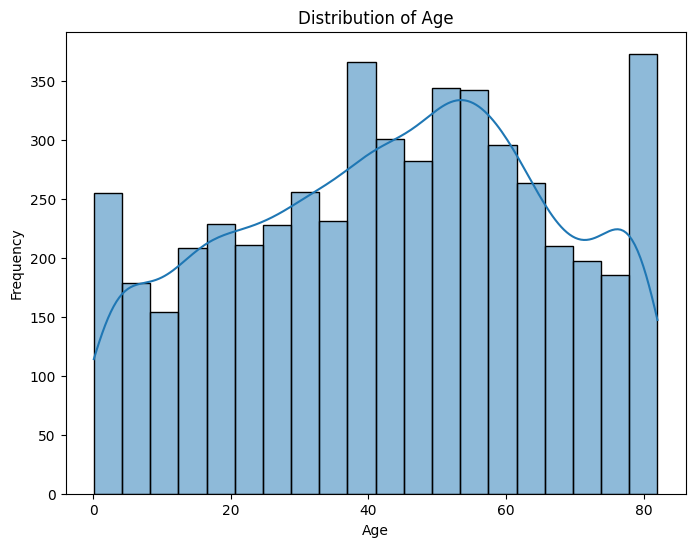

In [ ]:
#1. Distribusi Usia (Numerical) - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

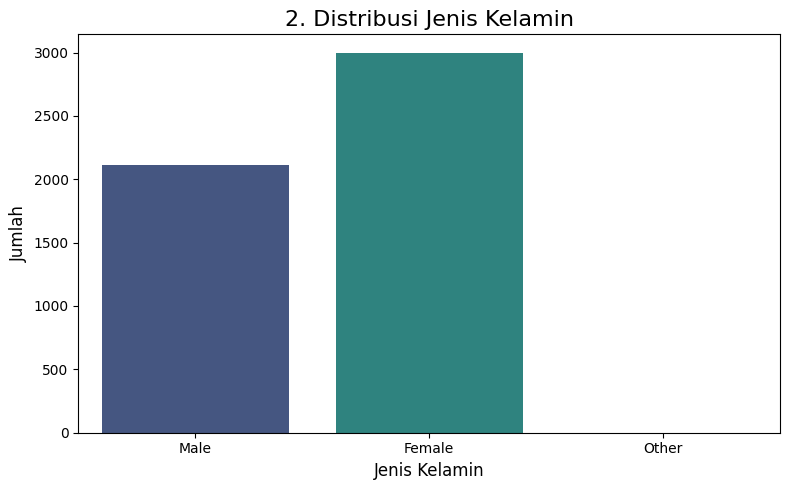

In [ ]:
# 2. Distribusi Jenis Kelamin (Categorical) - Count Plot
# Menunjukkan jumlah individu berdasarkan jenis kelamin.
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('2. Distribusi Jenis Kelamin', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.tight_layout()
plt.show()

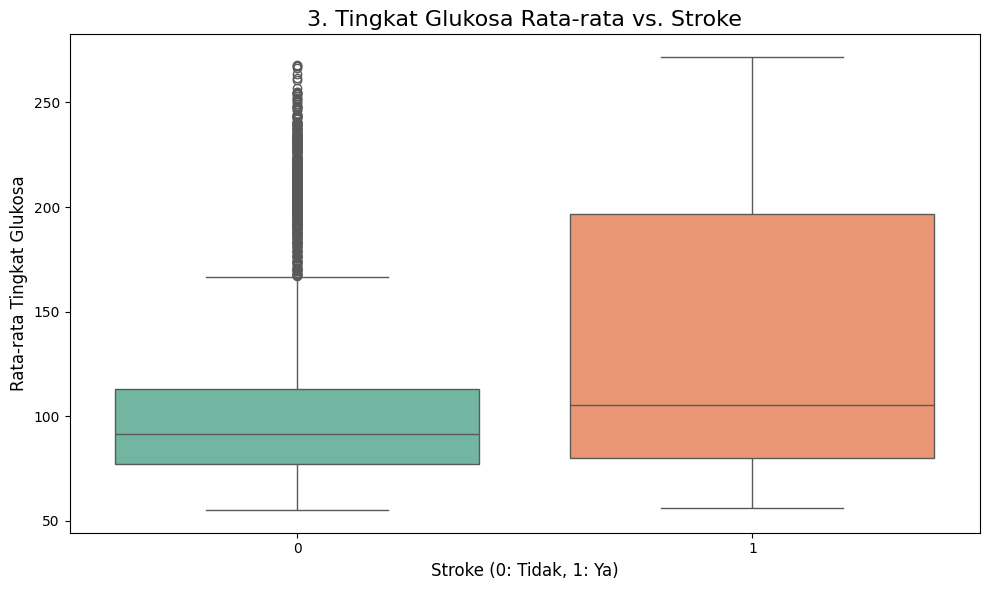

In [ ]:
# 3. Hubungan antara Rata-rata Tingkat Glukosa dan Stroke (Numerical vs Categorical) - Box Plot
# Membandingkan distribusi tingkat glukosa rata-rata antara individu yang mengalami stroke dan tidak.
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='Set2')
plt.title('3. Tingkat Glukosa Rata-rata vs. Stroke', fontsize=16)
plt.xlabel('Stroke (0: Tidak, 1: Ya)', fontsize=12)
plt.ylabel('Rata-rata Tingkat Glukosa', fontsize=12)
plt.tight_layout()
plt.show()

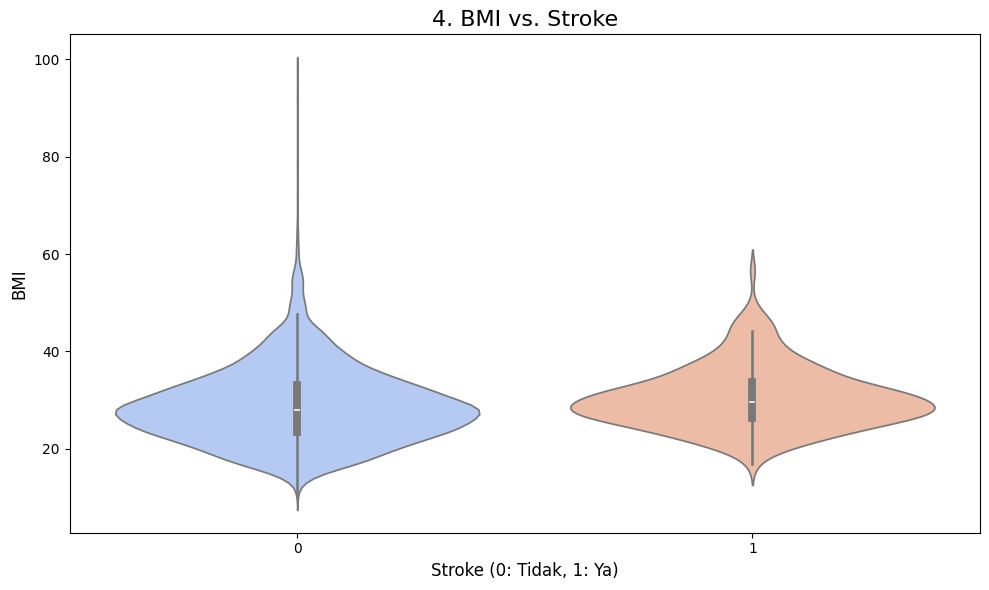

In [ ]:
# 4. Hubungan antara BMI dan Stroke (Numerical vs Categorical) - Violin Plot
df_bmi_cleaned = df[df['bmi'] != 'N/A'].copy() # Membuat salinan untuk menghindari SettingWithCopyWarning
df_bmi_cleaned['bmi'] = pd.to_numeric(df_bmi_cleaned['bmi']) # Mengonversi ke numerik

plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='bmi', data=df_bmi_cleaned, palette='coolwarm')
plt.title('4. BMI vs. Stroke', fontsize=16)
plt.xlabel('Stroke (0: Tidak, 1: Ya)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.tight_layout()
plt.show()

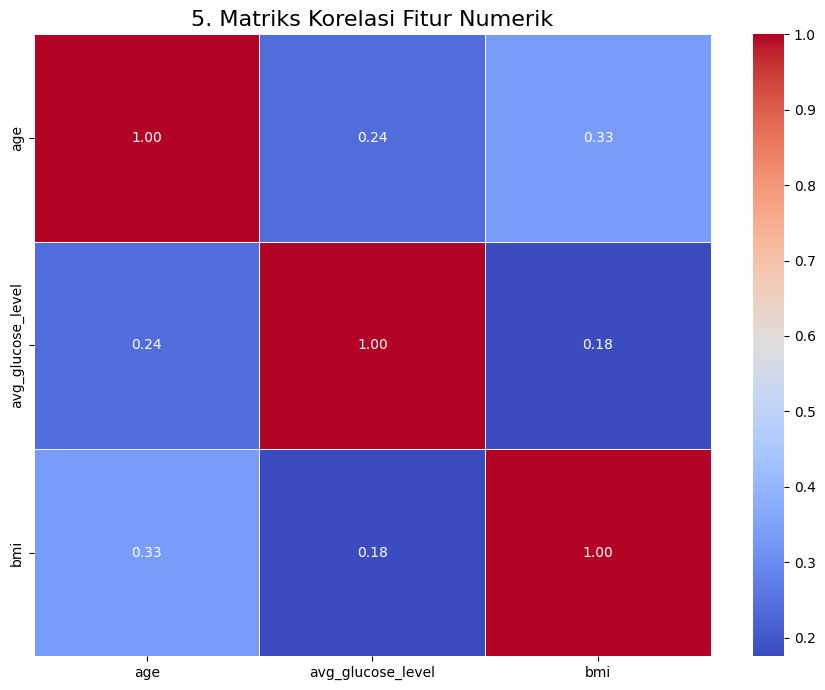

In [ ]:
# 5. Korelasi antara Fitur Numerik (Heatmap)
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
df_corr = df.copy()
df_corr['bmi'] = pd.to_numeric(df_corr['bmi'], errors='coerce')

plt.figure(figsize=(9, 7))
sns.heatmap(df_corr[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('5. Matriks Korelasi Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# Data Preparation

In [ ]:
df_clean = df.drop('id', axis=1)

In [ ]:
# Handle missing values
print("Missing values sebelum cleaning:")
print(df_clean.isnull().sum())

Missing values sebelum cleaning:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# BMI missing values - isi dengan median
if df_clean['bmi'].isnull().sum() > 0:
    median_bmi = df_clean['bmi'].median()
    df_clean['bmi'].fillna(median_bmi, inplace=True)
    print(f"BMI missing values diisi dengan median: {median_bmi}")

BMI missing values diisi dengan median: 28.1


In [ ]:
# Cek missing values setelah cleaning
print("\nMissing values setelah cleaning:")
print(df_clean.isnull().sum())


Missing values setelah cleaning:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# Identifikasi kolom kategorikal
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorikal yang akan di-encode:")
for col in categorical_cols:
    print(f"  {col}: {df_clean[col].unique()}")

Kolom kategorikal yang akan di-encode:
  gender: ['Male' 'Female' 'Other']
  ever_married: ['Yes' 'No']
  work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
  Residence_type: ['Urban' 'Rural']
  smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# Label encoding untuk setiap kolom kategorikal
label_encoders = {}
df_encoded = df_clean.copy()

In [ ]:
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [ ]:
print("\nData setelah encoding:")
print(df_encoded.head())
print(f"Data types: {df_encoded.dtypes}")


Data setelah encoding:
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  
Data types: gender                 int64
age                  float64
hypertension           int64
heart_disease          i

In [ ]:
# Pisahkan features dan target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Modeling

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train_balanced,
    y_train_balanced,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6913 - loss: 0.5544 - val_accuracy: 0.8888 - val_loss: 0.5014
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7773 - loss: 0.4496 - val_accuracy: 0.9190 - val_loss: 0.4428
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7956 - loss: 0.4145 - val_accuracy: 0.8875 - val_loss: 0.4822
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8055 - loss: 0.3994 - val_accuracy: 0.8689 - val_loss: 0.4650
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.4039 - val_accuracy: 0.9254 - val_loss: 0.3876
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.3908 - val_accuracy: 0.8933 - val_loss: 0.3948
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8192 - loss: 0.3704 - val_accuracy: 0.9068 - val_loss: 0.3947
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8200 - loss: 0.3673 - val_acc

# Evaluation

In [ ]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Test Accuracy: 0.8493 (84.93%)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       972
           1       0.14      0.40      0.21        50

    accuracy                           0.85      1022
   macro avg       0.55      0.64      0.56      1022
weighted avg       0.93      0.85      0.88      1022



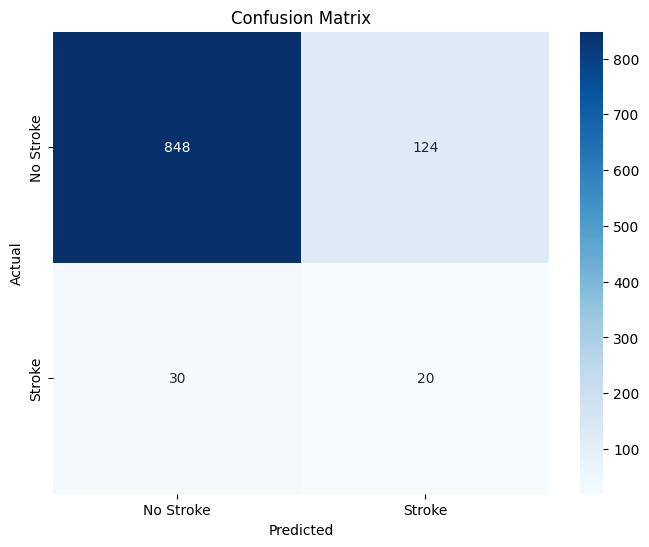

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Deployment

## Model Simulation

In [ ]:
input_data = np.array([[1,75,1,1,1,0,1,220,32.5,2]])

In [ ]:
input_data_scaled = scaler.transform(input_data)

In [ ]:
pred = model.predict(input_data_scaled)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


In [ ]:
print(f"  - Probabilitas Stroke: {pred:.4f} ({pred*100:.2f}%)")
print(f"  - Prediksi: {'STROKE' if pred > 0.5 else 'NO STROKE'}")

  - Probabilitas Stroke: 0.9409 (94.09%)
  - Prediksi: STROKE


## Save Model

In [ ]:
model_filename = 'stroke_model.h5'
model.save(model_filename)

In [ ]:
model = tf.keras.models.load_model('./stroke_model.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

In [ ]:
tflite_model = converter.convert()
with open("stroke_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpsmr80c8f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135903483541456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483536272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483540112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483533008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483539536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483530704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483531280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483528784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483529936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903483528016: TensorSpec(shape=(), dtype=tf.resource, name=None)
